In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd


/home/gk/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# ReLU

Rectified Linear Unit (ReLU) is the goto activation function for hidden layers in present days replacing sigmoid function which was generally used. It replaces negative activations with zero


In [70]:
def ReLU(Z_values):
    return np.maximum(0,Z_values)
# def leaky_relu(x, alpha=0.01):
#     return np.where(Z_values > 0, Z_values, 0.01 * Z_values)  


In [49]:
def initialize_weights(in_dim,out_dim):
    return np.random.randn(in_dim,out_dim) * np.sqrt(2 / in_dim)

# ReLU Derivative

Modifies activation values to 0 or 1. Value is modified to 1 if activation value is greater than 0 else modified to 0.

In [5]:
def ReLU_derivative(x):
    return (x > 0).astype(int)
# def ReLU_derivative(x, epsilon=1e-8):
#     return (x > epsilon).astype(int)

# Forward Propagation

In [51]:
def forward_propagation(X, Layers, Weights=None, Biases=None):
    # Initialize weights and biases if unspecified
    if Weights is None:
        Weights=[]
        
        Weights.append(initialize_weights(X.shape[1], Layers[0]))
       

        for i in range(1, len(Layers)):
            Weights.append( initialize_weights(Weights[i-1].shape[1], Layers[i]))
#         Weights = []
#         Weights.append(np.random.randn(X.shape[1], Layers[0]) * np.sqrt(2 / X.shape[1]))
#         for i in range(1, len(Layers)):
#             Weights.append(np.random.randn(Layers[i-1], Layers[i]) * np.sqrt(2 / Layers[i-1]))


    if Biases is None:
        Biases=[]
        Biases = [2*np.random.rand(n_units)-1 for n_units in Layers]
    
    Z_values = []
    Activations = []
    
    print("Starting forward propagation...")
    
    # First layer
    dot_product = np.dot(X, Weights[0]) 
    L1_value = dot_product + Biases[0][np.newaxis, :]
    Z_values.append(L1_value)
    Activations.append(ReLU(L1_value))
#     print(f"Layer 1 Activation Shape: {Activations[-1].shape} Weights Shape : {Weights[0].shape}")
    
    # Remaining layers
    for i in range(len(Layers) - 1):  
        dot_product = np.dot(Activations[i], Weights[i+1])
        Z_value = dot_product + Biases[i+1]
        Z_values.append(Z_value)
        Activations.append(ReLU(Z_value))
#         print(f"Layer {i + 2} Activation Shape: {Activations[-1].shape}")
    y_cap=[Activations[-1]]
    
    return Activations, Weights, Biases, y_cap, Z_values


Testing Forward Propagation

In [7]:
activation_values,W,B,_,_=forward_propagation(np.random.rand(10,3),Layers=[4,2,1])
for i in range(len(activation_values)):
    print(f"Layer {i+1} Activation: {activation_values[i]} \n\n Weights: {W[i]}\n\n Biases: {B[i]}\n\n")

Starting forward propagation...
Layer 1 Activation: [[1.96930767 2.68755358 1.55731584 1.20300941]
 [1.87297958 2.52746701 1.44064505 1.12315345]
 [1.47586787 1.84894602 0.82065061 0.60346584]
 [1.50248313 2.02966925 0.8874962  0.80174443]
 [1.63974075 2.13773793 1.05255493 0.79682393]
 [1.74505486 2.35058206 1.26688148 1.02864602]
 [1.31309254 1.67008895 0.60006417 0.52898951]
 [1.55441201 2.00406193 1.04833789 0.85692558]
 [1.48819135 1.90947733 0.93744734 0.7790926 ]
 [1.45282186 1.91491994 0.89533551 0.81339709]] 

 Weights: [[0.49432972 0.90006799 0.61295213 0.50415429]
 [0.18830369 0.19872718 0.47001847 0.34451054]
 [0.51691989 0.78766465 0.58559154 0.30859341]]

 Biases: [0.88645318 0.98736778 0.03100566 0.13613326]


Layer 2 Activation: [[5.60986478 5.40797084]
 [5.28455908 5.11706302]
 [3.6193162  3.75176039]
 [3.9720864  4.02547934]
 [4.26722982 4.30039224]
 [4.86146662 4.75231508]
 [3.14591846 3.34145437]
 [4.20317214 4.15521155]
 [3.93501728 3.94113058]
 [3.90586057 3.90910

Using MSE as cost function

In [8]:
def calculate_cost(Y, calculated_value):
    cost = np.mean((np.array(Y) - calculated_value) ** 2) / 2
    print(f"Cost: {cost}")
    return cost
    

# Calculating Gradients 


In [9]:
def calculate_gradients(Y, Weights, Biases, Activations):
    print("Calculating gradients...")
    weight_gradient = []
    bias_gradient = []
    
    # Output layer
    activation_gradient = (Activations[-1] - np.array(Y).reshape(-1, 1))/len(Y)
    Z_gradient = activation_gradient * ReLU_derivative(Activations[-1])
    W_gradient = np.dot(Z_gradient.T, Activations[-2])
    weight_gradient.insert(0, W_gradient.T)
    bias_gradient.insert(0, np.sum(Z_gradient, axis=0))
#     print(f"Output Layer Gradients - W: {W_gradient.shape}, B: {bias_gradient[-1].shape}")
    
    # Hidden layers
    for i in range(1, len(Weights)):
        activation_gradient = np.dot(Z_gradient, Weights[-i].T)
        Z_gradient = activation_gradient * ReLU_derivative(Activations[-i-1])
        W_gradient = np.dot(Z_gradient.T, Activations[-i-2])
        weight_gradient.insert(0, W_gradient.T)
        bias_gradient.insert(0, np.sum(Z_gradient, axis=0))
#         print(f"Layer {len(Weights) - i} Gradients - W: {W_gradient.shape}, B: {bias_gradient[-1].shape}")
    
    for i in range(len(weight_gradient)):
        print(f"Layer: {i+1} \n")
        print(f" weight : {Weights[i]}\n weight_grad :{weight_gradient[i]} \n\n")
        print(f" bias : {Biases[i]} \n bias_grad :{bias_gradient[i]}\n\n\n")

    return weight_gradient, bias_gradient

# Back Propagation


In [10]:
def backward_propagation(X, Y, W, b, Activations, learning_rate):
    print("Performing backward propagation...")
    new_activation = Activations.copy()
    new_activation.insert(0, X)
    
    weight_gradient, bias_gradient = calculate_gradients(Y, W, b, new_activation)
    
    # Update weights and biases
    new_weights = []
    new_biases = []
    for i in range(len(W)):
        new_weights.append(W[i] - learning_rate * weight_gradient[i])
        new_biases.append(b[i] - learning_rate * bias_gradient[i])
#         print(f"Updated Layer {i + 1} Weights Shape: {new_weights[-1].shape}, Biases Shape: {new_biases[-1].shape}")
    
    return new_weights, new_biases

# MLP

In [11]:
def MLP(X, y, Layers, iterations, learning_rate, error_margin):
    print("Training MLP...")
    iteration_count = 0
    cost = 100
    cost_history = []
 
    
    while iteration_count < iterations:
#     while iteration_count < 20: #Using fixed custom iterations for testing
        print(f"\nIteration {iteration_count + 1}")
        activation, weight, bias, _,_ = forward_propagation(X, Layers)
        cost = calculate_cost(y, activation[-1])
        cost_history.append(cost)
        
        W, B = backward_propagation(X, y, weight, bias, activation, learning_rate)
        
        if cost <= error_margin:
            print("Error margin reached, stopping training.")
            break
        
        iteration_count += 1
    
    return W, B, Layers, cost_history

# Testing MLP 

Training MLP...

Iteration 1
Starting forward propagation...
Cost: 2750.3863928416495
Performing backward propagation...
Calculating gradients...
Layer: 1 

 weight : [[ 0.88294928 -0.07891642  0.62114588]
 [-0.76084723  1.693846    1.35593359]]
 weight_grad :[[0. 0. 0.]
 [0. 0. 0.]] 


 bias : [ 0.96115945  0.49130908 -0.14709223] 
 bias_grad :[0. 0. 0.]



Layer: 2 

 weight : [[-0.28635523]
 [-1.13519258]
 [-0.04848915]]
 weight_grad :[[0.]
 [0.]
 [0.]] 


 bias : [-0.64194599] 
 bias_grad :[0.]




Iteration 2
Starting forward propagation...
Cost: 2736.5055546128096
Performing backward propagation...
Calculating gradients...
Layer: 1 

 weight : [[ 0.80528256 -0.56969308  0.03890093]
 [-0.84057024  1.1519571   0.46314712]]
 weight_grad :[[  0.           4.16480333  -5.81792175]
 [  0.         -16.08888247  25.48003512]] 


 bias : [-0.49275216  0.96408162  0.14442531] 
 bias_grad :[  0.         -15.50305113  23.62444366]



Layer: 2 

 weight : [[-0.53847284]
 [ 0.52448885]
 [-0.82

Performing backward propagation...
Calculating gradients...
Layer: 1 

 weight : [[-0.19026545  0.78288382 -0.15598594]
 [ 1.33826292 -0.12216204  0.86595128]]
 weight_grad :[[ -0.33265182   0.           2.39661766]
 [  1.79023899   0.         -12.89792557]] 


 bias : [-0.00672812 -0.93266426  0.14512064] 
 bias_grad :[ 1.07631354  0.         -7.75439029]



Layer: 2 

 weight : [[-0.11350866]
 [-0.08575353]
 [ 0.81778256]]
 weight_grad :[[-21.60065223]
 [  0.13064784]
 [-15.49083651]] 


 bias : [-0.94350587] 
 bias_grad :[-9.48221533]




Iteration 60
Starting forward propagation...
Cost: 2748.9885591645416
Performing backward propagation...
Calculating gradients...
Layer: 1 

 weight : [[ 0.05168598  1.17170333  1.87569603]
 [ 0.57916969  1.55180007 -0.0787748 ]]
 weight_grad :[[ 0.47159216  0.69750848  0.        ]
 [-1.89658725 -2.80514777  0.        ]] 


 bias : [-0.4406999   0.23352021 -0.00911055] 
 bias_grad :[-1.18573008 -1.75375432  0.        ]



Layer: 2 

 weight : [[ 0.

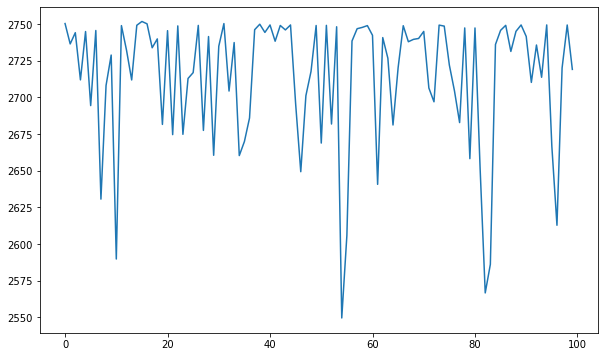

In [71]:
# X = np.array([
#     [0, 0, 0],
#     [0, 0, 1],
#     [0, 1, 0],
#     [0, 1, 1],
#     [1, 0, 0],
#     [1, 0, 1],
#     [1, 1, 0],
#     [1, 1, 1]
# ])

# Y = np.sum(X, axis=1) % 2  

X = np.random.rand(100, 2) * 10  # 100 samples, 2 features, values scaled to [0, 10]

# Calculate target values
Y = np.sum(X**2, axis=1).reshape(-1, 1)  # Sum of squares for each row

# Normalize inputs
X_mean=np.mean(X,axis=0)
X_std=np.std(X,axis=0)
standard_X = (X - X_mean)/X_std

#hyperparameters
train_iterations=100
Layers=[3,1]


# wt,bias,layers,cost_history=MLP(np.random.rand(10,3),[1,2,3,4,5,6,7,8,9,10],[4,2,1],100,0.01,0.5)
wt, bias, layers, cost_history = MLP(standard_X, Y, Layers=Layers, iterations=train_iterations, learning_rate=0.05, error_margin=0.01)

for i in cost_history:
    print(i)
plt.figure(figsize=(10,6))
plt.plot([i for i in range(train_iterations)],cost_history)
plt.show()

# Inferencing Values using trained MLP

In [77]:
test_X=[1,5]
X_std_test=(np.array(test_X)-X_mean)/X_std

activation_values,W,B, inference,_=forward_propagation(X_std_test,Weights=wt,Biases=bias,Layers=Layers)



for i in range(len(activation_values)):
    print(f"Layer {i+1} Activation: {activation_values[i]} \n\n Weights: {W[i]}\n\n Biases: {B[i]}\n\n")
    

inference

Starting forward propagation...
Layer 1 Activation: [[-0.02038212  2.05942565 -0.019585  ]] 

 Weights: [[ 0.99005612 -1.25355799  1.95962456]
 [-0.25334327  1.40525479  2.30448432]]

 Biases: [-0.7749838   0.45035469  0.51688212]


Layer 2 Activation: [[5.44470449]] 

 Weights: [[0.53627922]
 [1.80535902]
 [4.75814932]]

 Biases: [1.83082066]




[array([[5.44470449]])]

# Critical Evaluation

Following aspects will be added in the future:
1) Regularization to avoid overfitting
2) Cross validation for overfitting training set
3) Adam optimizer for momentum during learning
4) Adapt Batch processing instead of using whole training set each iteration
5) Class based approach for building model making the code easier and intuitive
6) Option to use various activation functions besides ReLU
7) Hyperparameter Tuning

In [19]:
b=np.array([[1,2,3],[-1,0,10]])
a=ReLU_derivative(b)
a


array([[1, 1, 1],
       [0, 0, 1]])